In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\train'
validation_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\validation'
test_dir = r'C:\Users\Sudir\Desktop\SDLLearn\4.CNN for Computer Vision with Keras and TF in Python\Others\CNN Python Code\test'

In [3]:
#DATA PREPROCESSING
train_datagen = ImageDataGenerator(
        rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
model = models.Sequential()

model.add(tf.keras.layers.Conv2D (32, (3,3), activation = 'relu', 
                                 input_shape=(150,150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D (128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers

model.compile( optimizer= optimizers.RMSprop(lr=1e-4), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])


In [8]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 100, 
    epochs=20,
    validation_data = validation_generator, 
    validation_steps= 50)

Epoch 1/20
100/100 [==============================] - 102s 1s/step - loss: 0.6909 - accuracy: 0.5375 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 64s 644ms/step - loss: 0.6657 - accuracy: 0.6005 - val_loss: 0.6606 - val_accuracy: 0.5870
Epoch 3/20
100/100 [==============================] - 68s 675ms/step - loss: 0.6231 - accuracy: 0.6645 - val_loss: 0.6194 - val_accuracy: 0.6800
Epoch 4/20
100/100 [==============================] - 191s 2s/step - loss: 0.5890 - accuracy: 0.6905 - val_loss: 0.6066 - val_accuracy: 0.6710
Epoch 5/20
100/100 [==============================] - 85s 854ms/step - loss: 0.5468 - accuracy: 0.7260 - val_loss: 0.5808 - val_accuracy: 0.6890
Epoch 6/20
100/100 [==============================] - 66s 659ms/step - loss: 0.5198 - accuracy: 0.7390 - val_loss: 0.5811 - val_accuracy: 0.6950
Epoch 7/20
100/100 [==============================] - 66s 659ms/step - loss: 0.4808 - accuracy: 0.7750 - val_loss: 0.5543 - val_accura

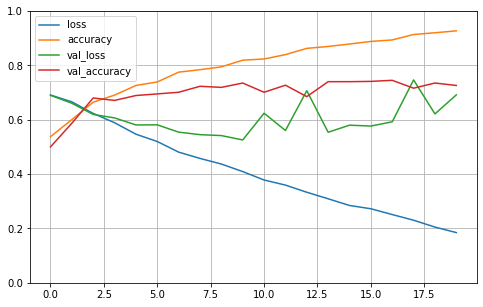

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.save('model.h5')

In [11]:
from tensorflow.keras import backend as K

In [12]:
K.clear_session()
del model